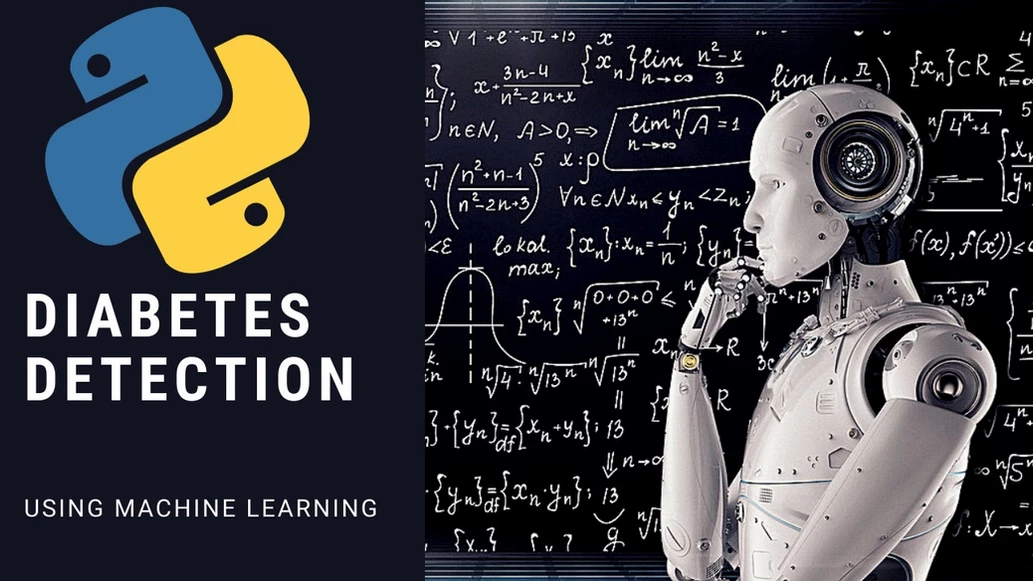

## <span style = "color:red;">Objective:</span>
###      * To predict a person as Diabetic or NOT based on given feature set. 
           

## <span style = "color:red;">Info about the dataset:</span>
#### **Pregnancies:** Number of times pregnant
#### **Glucose:** Plasma Glucose Concentration (mg/dl)
#### **Blood Pressure:** Diastolic Blood Pressure(mmHg)
#### **Skin Thickness:** A value used to estimate body fat.
#### **Insulin:** 2-Hour Serum Insulin (mu U/ml)
#### **BMI:** Body Mass Index (weight in kg/ height in m2)
#### **Diabetes Pedigree Function:** It provides information about diabetes history in relatives and    genetics. 
#### **Age:** Age (years)
#### **Outcome:** 0 = Diabetic, 1 = Not Diabetic.

## <span style = "color:red;">Highlights of the project:</span>
### * we will implement the project using multiple algorithms present in scikit-learn library.
### * we will be using Deep Learning later.
### * we will perform tuning operation, so as to try and improve our score.
### * we will perform basic model evaluation since the data is itself not that big and complicated.
### * I ll also implement this project using streamlit app and the link for the same ll be given.
### * Everything ll be in parts.

## <span style="color: red;">Part 1: Using Scikit-Learn</span>

   ### <span style = "color:#9176e8;">Part 1.1: Importing data and doing basic evaluation</span>

In [1]:
## importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing data:
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape,df.columns

((768, 9),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
## conclusions from above pandas operation:

     ## datatype of all columns in the dataset is numerical so no need for any conversions.
     ## dataset doesn't have any null values, so need to perform missing values operation.
     ## It has 9 columns.
     ## dataset is imbalanced and we won't balance it due it's small size.
     ## All this things makes these dataset very user friendly.

In [9]:
## Looking at all the columns each one of them are crucial for final outcome.
## So,we will not drop any of the columns.
## Let's Visualize some relations between columns and outcome.

   ## <span style = "color:#9176e8;">Part 1.2: IN DEPTH Data Visualisation with conclusions</span>

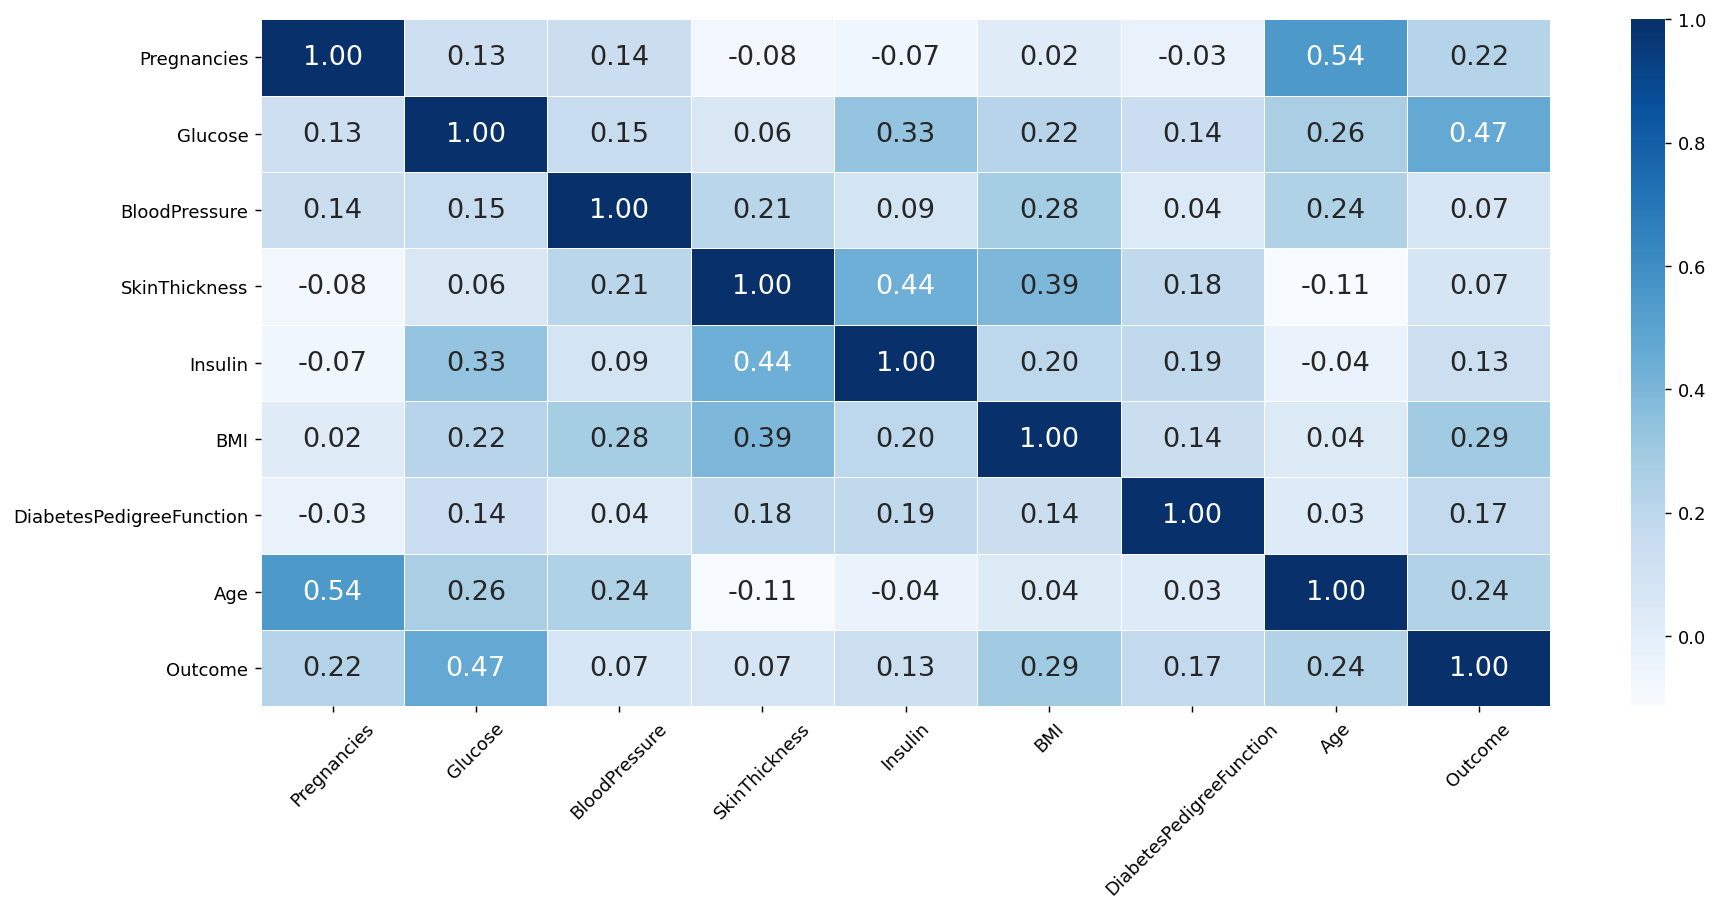

In [10]:
## let's start with correlation matrix:

corr_matrix = df.corr()
plt.figure(figsize=(16,7),dpi=130)
sns.heatmap(corr_matrix,
           annot=True, annot_kws={'size': 15},
           linewidths = 0.5,
           fmt=".2f", cmap = "Blues")
plt.xticks(rotation = 45);

### <span style = "color: purple;">Inference from above correlation:</span> 
#### * There is a strong correlation between Outcome and BMI which suggest obesity as some role to play.
#### * There is also good correlation between Outcome and Pregnancies.
#### * The outcome is very much dependent on Glucose since it show very high correlation.
#### * If we focus inside of the matrix than Glucose and insulin shows strong relation as well.
#### * Our further plotting will be based on this inference.

In [11]:
## removing warnings:
import warnings
warnings.filterwarnings('ignore')

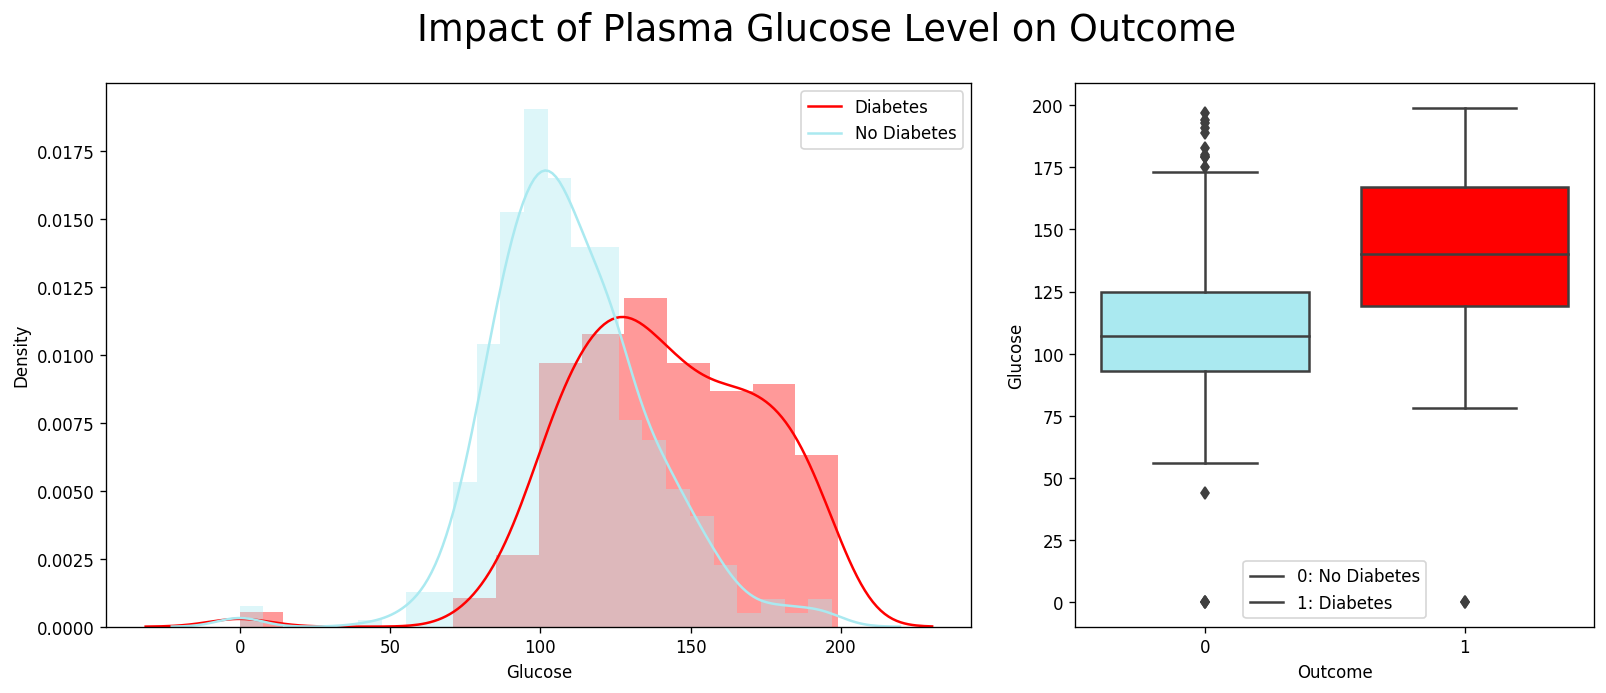

In [12]:
## Visualizing effects of Glucose concentration on Outcome:

fig, axes = plt.subplots(1,2,figsize = (16,6), gridspec_kw={
                           'width_ratios': [5, 3],'wspace': 0.15},dpi = 120)

## code for distplot: 

sns.distplot(df['Glucose'][df.Outcome == 1],ax = axes[0],color = "red")
sns.distplot(df['Glucose'][df.Outcome == 0],ax = axes[0],color = "#aae9f0")
axes[0].legend(["Diabetes","No Diabetes"])

## code for boxplot:

sns.boxplot(x = "Outcome", y = "Glucose",data = df,ax = axes[1])
axes[1].legend(["0: No Diabetes","1: Diabetes"])

## I have used hexadecimal color values from color picker by googling it 
       ## You can access each figure within a plot by using artist[number]


mybox1 = axes[1].artists[0]      ## (selected 1st figure from plot 2 that is boxplot)
mybox1.set_facecolor('#aae9f0')

mybox2 = axes[1].artists[1]     ## (selected 2nd figure from plot 2 that is boxplot)
mybox2.set_facecolor('red')
##plt.tight_layout(pad = 2)
plt.suptitle("Impact of Plasma Glucose Level on Outcome",fontsize = 22);

### Both the figures gives a clear picture that people having high level of Plasma Glucose Concentration are very likely to have a Diabetes.

In [13]:
## importing this library for drawing figures on a plot:

import matplotlib.patches as mpatches

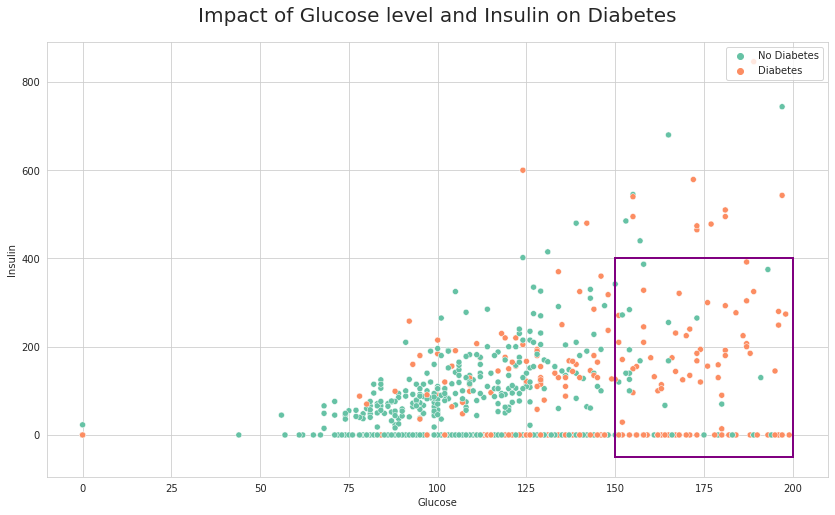

In [14]:
## Plotting effects of Glucose and insulin on Outcome:

sns.set_style("whitegrid")
plt.figure(figsize=(14,8))
ax = sns.scatterplot(data=df, x = "Glucose", y = "Insulin", hue = "Outcome",palette = "Set2")

## Setting custom labels:
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['No Diabetes', 'Diabetes'], loc='upper right')

plt.title("Impact of Glucose level and Insulin on Diabetes",{"fontsize":20},pad = 20)

## plotting a rectangle to highlight an area of interest:
rect=mpatches.Rectangle((150,-50),50,450, 
                        fill=False,
                        color="purple",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect);

### This Scatter plot shows the impact of insulin along with plasma glucose concentration.
### The Rectangle box shows that people with high glucose plasma level and low insulin are almost certain to be Diabetic.

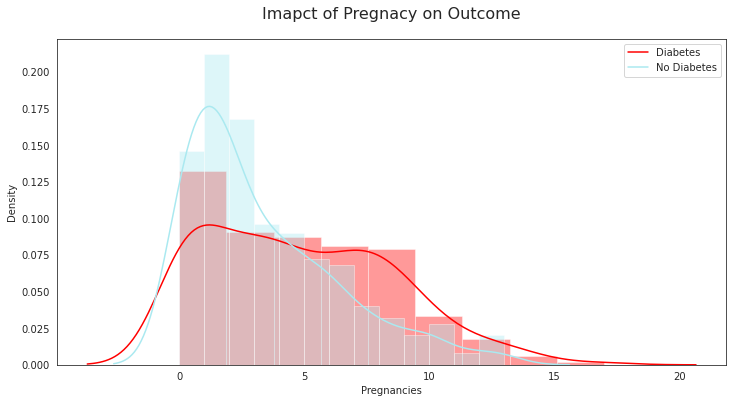

In [15]:
## plotting impact of pregnancies on Outcome:

plt.figure(figsize=(12,6))
sns.set_style("white")
plt.title("Imapct of Pregnacy on Outcome",fontsize = 16,pad = 20)
sns.distplot(df['Pregnancies'][df.Outcome == 1], color ="red")
sns.distplot(df['Pregnancies'][df.Outcome == 0], color ="#aae9f0")
plt.legend(['Diabetes', 'No Diabetes']);

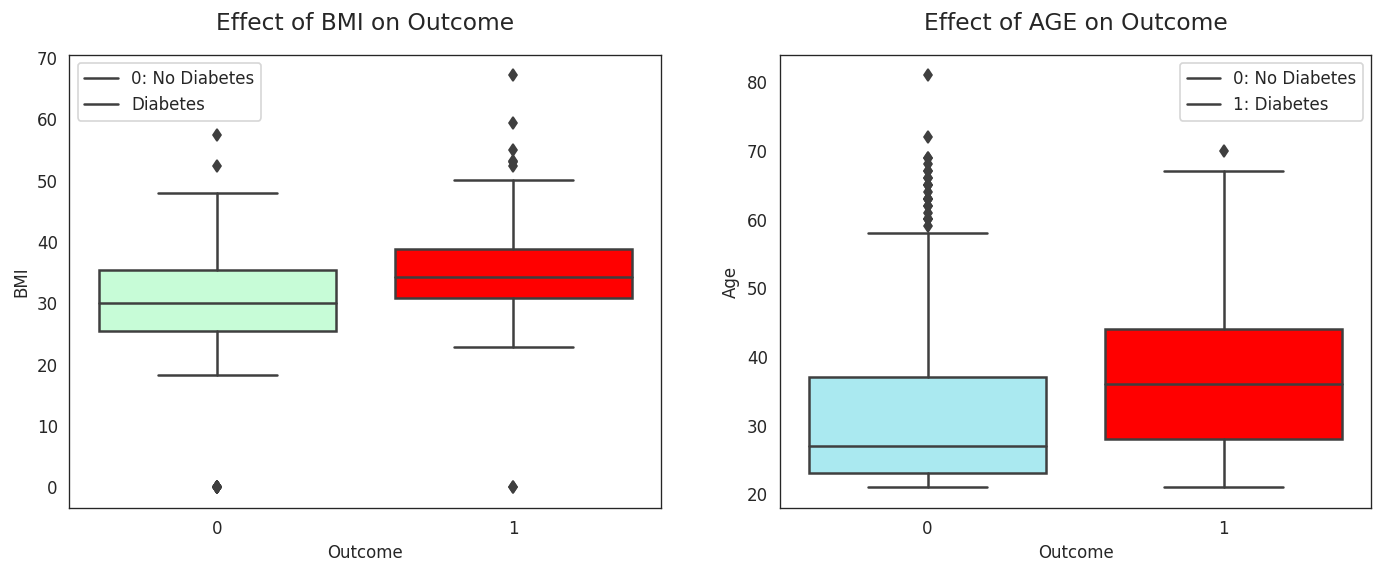

In [16]:
## Visualizing effects of Glucose concentration on Outcome:

fig, axes = plt.subplots(1,2,figsize = (14,5),dpi = 120)

## code for 1st plot:

axes[0].set_title("Effect of BMI on Outcome",fontsize = 14,pad = 15)
sns.boxplot(x = "Outcome", y = "BMI",data = df,ax = axes[0])
axes[0].legend(["0: No Diabetes","Diabetes"])

## code for 2nd plot:

axes[1].set_title("Effect of AGE on Outcome",fontsize = 14,pad = 15)
sns.boxplot(x = "Outcome", y = "Age",data = df,ax = axes[1])
axes[1].legend(["0: No Diabetes","1: Diabetes"])


mybox0_0 = axes[0].artists[0]       ## selecting 1st figure from 1st plot and setting color as before
mybox0_0.set_facecolor('#c7fcd7')   ## and so on ...

mybox0_1 = axes[0].artists[1]  
mybox0_1.set_facecolor('red')
##plt.tight_layout(pad = 2)

mybox1_0 = axes[1].artists[0]
mybox1_0.set_facecolor('#aae9f0')

mybox1_1 = axes[1].artists[1]
mybox1_1.set_facecolor('red')
##plt.tight_layout(pad = 2);

   ## <span style = "color:#9176e8;">Part 1.3: Feature Scaling and Splitting of Data:</span>

In [17]:
## imports for above processes:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
## splitting features and target:
x = df.drop("Outcome",axis = 1)
y = df.Outcome

In [19]:
## splitting train and test data:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [20]:
## performing feature scaling:

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

   ## <span style = "color:#9176e8;">Part 1.4: Model Building:</span>

In [21]:
## importing models:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

   ### Creating a function for Model fit and score:

In [22]:
## putting models in a dictionary:

models = {"log_regression": LogisticRegression(),
          "random_forest": RandomForestClassifier(),
          "svc": SVC(kernel = "rbf")}

## creating function for fitting and scoring:

def fit_score(model,x_train,x_test,y_train,y_test):
    
    np.random.seed(0)             ## for reproducibility
    model_scores = {}
    
    for model_name, model in models.items():   ## ll take name and model from models dictionary 1 by1
        
        model.fit(x_train,y_train)    ## fit model 1 by 1 on training data
        model_scores[model_name] = model.score(x_test,y_test) ## append score in model_score dictionary
        
    return model_scores

In [23]:
## importing score metrics before fitting:

from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [24]:
## fitting our base model:

model_scores = fit_score(model = models,
                         x_train = scaled_x_train, x_test = scaled_x_test,
                         y_train = y_train, y_test = y_test)

In [25]:
## let's see the results:

model_scores

{'log_regression': 0.8246753246753247,
 'random_forest': 0.7857142857142857,
 'svc': 0.7922077922077922}

   ## <span style = "color:#9176e8;">BEAUTIFUL, Our Models are producing great results with l_r being the Best:</span>
* ### Seeing ml models train and produce results in one of the Best feelings.
* ### let's visualize this results for more awesomeness.

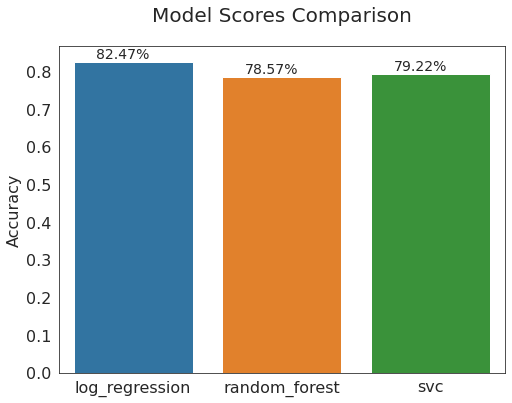

In [26]:
df_model_scores = pd.DataFrame(model_scores,index = ["Accuracy"])
plt.figure(figsize = (8,6))
sns.barplot(x = df_model_scores.columns, y = df_model_scores.loc["Accuracy"])
plt.title("Model Scores Comparison",fontsize=20,pad = 25)
plt.xticks(fontsize = 16),plt.yticks(fontsize = 16),plt.ylabel("Accuracy",fontsize=16)

## code for plotting percentages on top of every bar

for index,data in enumerate(df_model_scores.loc["Accuracy"]):
  plt.text(x=index - 0.25,y=data+0.01,s=f"{data*100:.2f}%",fontsize = 14);

   ## <span style = "color:#9176e8;">Part 1.5: Model Evaluation:</span>

### Classification Report:

In [27]:
## classification report:

def get_classification_report(model,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test):
    np.random.seed(0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))

In [28]:
for model_name, model in models.items():
    print(f'Classification Report for {model_name}')
    get_classification_report(model=model)

Classification Report for log_regression
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Classification Report for random_forest
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154

Classification Report for svc
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg     

### ROC curve:

In [29]:
def get_roc_curve(model,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test):
    np.random.seed(0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    plot_roc_curve(model,x_test,y_test)

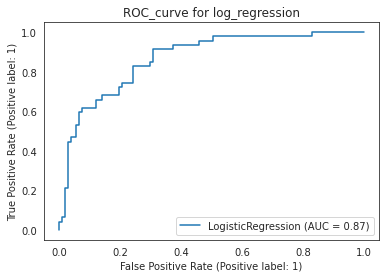

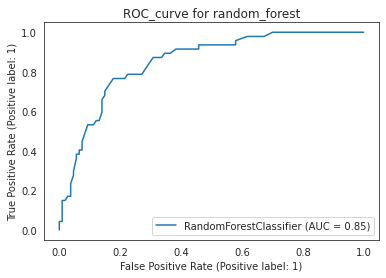

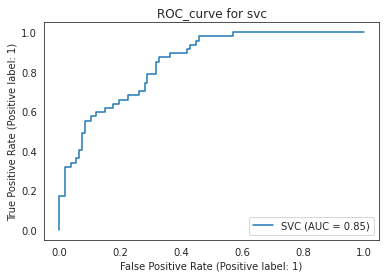

In [30]:
for model_name, model in models.items():
    get_roc_curve(model)
    plt.title(f'ROC_curve for {model_name}');

### Confusion Matrix:

In [31]:
def get_confusion_matrix(model,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test):
    np.random.seed(0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    return confusion_matrix

In [32]:
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")
    get_confusion_matrix(model);

Confusion Matrix for log_regression:
[[98  9]
 [18 29]]
Confusion Matrix for random_forest:
[[92 15]
 [18 29]]
Confusion Matrix for svc:
[[98  9]
 [23 24]]


### Confusion Matrix is rather confusing us.
### So, Let's Plot this results using Heatmap and add Percentage to it for Better Understanding.

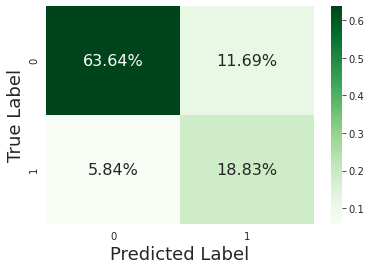

In [33]:
## Heatmap for Logistic Regression Model:

lr = LogisticRegression()
lr.fit(scaled_x_train,y_train)
y_pred = lr.predict(scaled_x_test)
cf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="Greens",annot_kws={'size':16})
plt.xlabel("Predicted Label",fontsize = 18)
plt.ylabel("True Label",fontsize = 18);

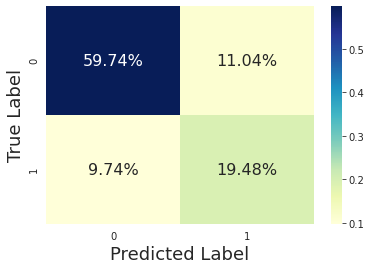

In [34]:
## Heatmap for Random Forest Classifier Model:

rf = RandomForestClassifier()
rf.fit(scaled_x_train,y_train)
y_pred = rf.predict(scaled_x_test)
cf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='YlGnBu',annot_kws={'size':16})
plt.xlabel("Predicted Label",fontsize = 18)
plt.ylabel("True Label",fontsize = 18);

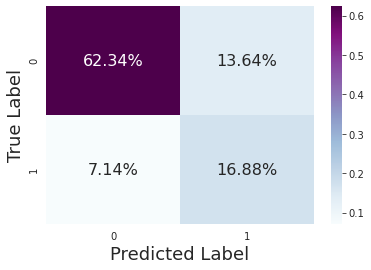

In [35]:
## Heatmap for SVC Model:

svc = SVC(kernel = "rbf")
svc.fit(scaled_x_train,y_train)
y_pred = svc.predict(scaled_x_test)
cf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='BuPu',annot_kws={'size':16})
plt.xlabel("Predicted Label",fontsize = 18)
plt.ylabel("True Label",fontsize = 18);

   ## <span style = "color:#9176e8;">Part 1.6: Model Tuning:</span>

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
## param grid for tuning logistic regression model: 

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(0,10, 20),'l1_ratio': np.linspace(0,1,20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [5000]
    }
]

In [38]:
## injecting paramgrid into the model: 

classifier = GridSearchCV(LogisticRegression(),param_grid=param_grid,verbose=True,n_jobs=-1,cv=3)

In [39]:
tuned_log_regression = classifier.fit(scaled_x_train,y_train)

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


In [40]:
## our BEST params:
tuned_log_regression.best_estimator_

LogisticRegression(l1_ratio=0.0, max_iter=5000, penalty='l1', solver='saga')

In [41]:
tuned_log_regression.score(scaled_x_test,y_test)

0.8246753246753247

### Tuning Logistic model produced no improvement, let's do it for SVC...

In [42]:
## rbf kernel is best suited for this type of data also c = 0.1 works best in most cases
## Hence, tuning for gamma values

gammas = [0.1, 1, 10, 100]
svc_scores = []
for gamma in gammas:
   svc = SVC(kernel="rbf", gamma=gamma,C=0.1).fit(scaled_x_train, y_train)
   svc_scores.append(svc.score(scaled_x_test,y_test))
   

In [43]:
max(svc_scores)

0.8051948051948052

### So, we got an improvement of (80.51 - 79.22) = <span style = "color:green;">1.29 %</span>

* ## <span style="color: #9176e8;">Please upvote, if you found this helpful</span>
* ## <span style="color: #9176e8;">For any doubts do comment will try my best to solve it</span>
## <span style="color: #9176e8;">THANKS...</span>

In [44]:
## PART 2: Predicting using Deep Learning

## will be updating soon ....

In [45]:
## PART 3: Model Deployment using Streamlit

## will be updating soon....